# Image Processing

## Demo Instructions:
1. Read in a color image in a standard format (e.g. jpg, png, etc) into an array (likely an X x Y x 3 array)
2. Plot the original image from the array format data.
3. For a portion of the image, show the array values and the associated clip of the image.
4. Display the color histograms for each of the 3 colors in the image, and display a summary bar plot showing the relative amounts of Red, Green, and Blue (or whatever 3 color palette is used).
5. Pick 3 images that, in a natural way, vary in the amount of red, green, and blue and plot the relative amounts of each color for each (e.g. a rose, a tree, a beach scene with lots of sky)

# Solutions:
## 1. Read in a color image in a standard format into an array

This code will read an image of a sunset into an array. When it’s read in as an array in Python, the shape of the array is an X by Y by 4 array. The 4th part of the array dictates the transparency of the different parts of the image, which explains why there are ones and various other values in the fourth column of the array. 

** If PIL is not installed in your computer, do the following:**
1. Go to Anaconda prompt and type **conda install pillow**. Press Y when prompted Proceed ([Y]/N)?

2. Go to ...\Anaconda3\Lib\site-packages\PIL and open Image.py

3. Change
    
    *if PILLOW_VERSION != getattr(core, 'PILLOW_VERSION', None): raise ImportError("The _imaging extension was built for another " " version of Pillow or PIL")*
    
 to
    
    *if core.PILLOW_VERSION != getattr(core, 'PILLOW_VERSION', None): raise ImportError("The _imaging extension was built for another " " version of Pillow or PIL")*
4. Save Image.py

[[[0.10588235 0.45490196 0.87058824]
  [0.         0.3882353  0.85490197]
  [0.05490196 0.42352942 0.8627451 ]
  ...
  [0.05882353 0.41568628 0.85882354]
  [0.00392157 0.3764706  0.84705883]
  [0.10980392 0.44313726 0.8627451 ]]

 [[0.05490196 0.42352942 0.8627451 ]
  [0.         0.3882353  0.85490197]
  [0.         0.3882353  0.85490197]
  ...
  [0.00392157 0.38039216 0.8509804 ]
  [0.00784314 0.38039216 0.8509804 ]
  [0.05882353 0.4117647  0.85490197]]

 [[0.05490196 0.42352942 0.8627451 ]
  [0.         0.3882353  0.85490197]
  [0.         0.3882353  0.85490197]
  ...
  [0.00392157 0.38039216 0.8509804 ]
  [0.00784314 0.38039216 0.8509804 ]
  [0.05882353 0.4117647  0.85490197]]

 ...

 [[0.85490197 0.69803923 0.53333336]
  [0.8509804  0.68235296 0.50980395]
  [0.8509804  0.68235296 0.50980395]
  ...
  [0.84313726 0.6745098  0.5019608 ]
  [0.8392157  0.67058825 0.49803922]
  [0.84705883 0.6901961  0.52156866]]

 [[0.8509804  0.69803923 0.54901963]
  [0.84313726 0.68235296 0.5176471 ]


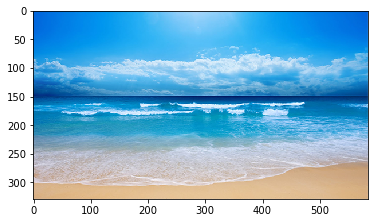

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image

#Reads the image of a sunset into an array
img = mpimg.imread('./Images/beach.png')
print(img)

#Plots the image from the array data 
imgplot = plt.imshow(img)

#Prints the shape of the image array
print()
print("Shape of the image array")
print(img.shape)

## 2. Plot the original image from the array formatted data

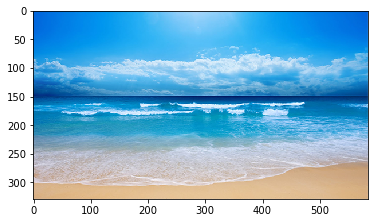

In [7]:
#Plots the image from the array data 
imgplot = plt.imshow(img)
plt.show()

## 3. For a portion of the image, show the array values and the associated clip of the image. 

[]


ValueError: zero-size array to reduction operation minimum which has no identity

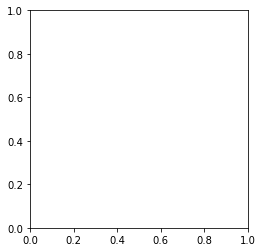

In [8]:
#Portion of the image
#X-range on the right and y-range on the left 
cropped_img = img[1380:1400, 1940:1960]
print(cropped_img)

#Plot the cropped image 
cropped_img_plot = plt.imshow(cropped_img)
plt.show()

## 4. Display the color histograms for each of the 3 colors in the image, and display a summary pie chart showing the relative amounts of Red, Green, and Blue.

This piece of code makes a function for developing the color histograms for the various images and a function for developing the relative color pie charts for the various images.

In [12]:
#Function to make the color histograms 
def make_histogram(image):
    def getRed(redVal):
        return '#%02x%02x%02x' % (redVal, 0, 0)

    def getGreen(greenVal):
        return '#%02x%02x%02x' % (0, greenVal, 0)

    def getBlue(blueVal):
        return '#%02x%02x%02x' % (0, 0, blueVal)

    # Modify the color of two pixels
    image.putpixel((0,1), (1,1,5))
    image.putpixel((0,2), (2,1,5))

    # Display the image
    image.show()

    # Get the color histogram of the image
    histogram = image.histogram()


    # Take only the Red counts
    red = histogram[0:256]
 
    # Take only the Green counts
    green = histogram[256:512]

    # Take only the Blue counts
    blue = histogram[512:768]
    
    fig = plt.figure()
    
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    
    # Red histogram
    for i in range(0, 256):
        ax1.set_title('Red Histogram')
        ax1.bar(i, red[i], color = getRed(i), edgecolor=getRed(i), alpha=0.3)

    # Green histogram
    for i in range(0, 256):
        ax2.set_title('Green Histogram')
        ax2.bar(i, green[i], color = getGreen(i), edgecolor=getGreen(i),alpha=0.3)

    # Blue histogram
    for i in range(0, 256):
        ax3.set_title('Blue Histogram')
        ax3.bar(i, blue[i], color = getBlue(i), edgecolor=getBlue(i),alpha=0.3)
        
    fig.subplots_adjust(hspace=0.2,top=0.5,wspace=0.2)
    fig.tight_layout()

    plt.show()
    
#Function to make pie-chart of relative RGB values
def make_pie_chart(image):
    #Average of red, green, blue values 
    RGBtuple = np.array(image).mean(axis=(0,1))
    averageRed = RGBtuple[0]
    averageGreen = RGBtuple[1]
    averageBlue = RGBtuple[2]

    #Pie chart with amount of red, green, and blue in the image
    #Data to plot
    labels = 'Red','Green','Blue'
    sizes = [averageRed,averageGreen,averageBlue]
    colors = ['red','green','blue']
    explode = (0.1,0,0)
    #Plotting the pie chart
    plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=270)
    plt.title('Relative Amount of Red, Green, and Blue in the Image',fontweight='bold')
    plt.axis('equal')
    plt.show()

This piece of code will use these functions to output the color histograms and the pie chart for the image of the sunset from above. 

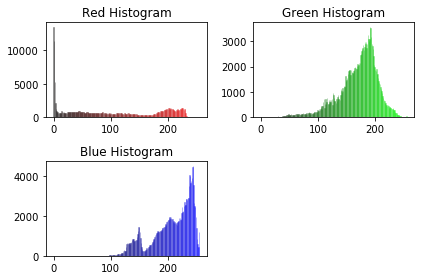

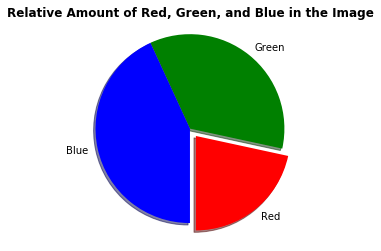

In [13]:
#https://pythontic.com/image-processing/pillow/histogram
imageSunset = Image.open('Images/beach.png')
    
#Histogram for sunset image-- reads in the image of the sunset
make_histogram(imageSunset)
make_pie_chart(imageSunset)

## 5. Pick 3 images that, in a natural way, vary in the amount of red, green, and blue and make a pie chart for the relative amounts of each color. 

### Primarily Red image

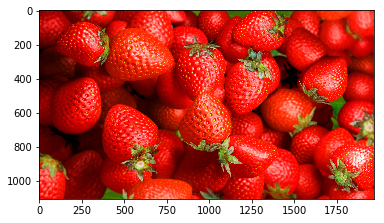

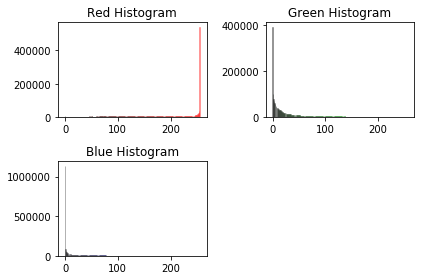

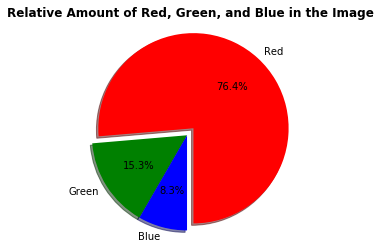

In [6]:
#Reads the image of a strawberry into an array
strawberry= mpimg.imread('Images/strawberries.png')

#Plots the image of a strawberry from the array data 
strawberry_plot = plt.imshow(strawberry)

#https://pythontic.com/image-processing/pillow/histogram
imageStrawberry = Image.open('Images/strawberries.png')

#Color histograms and pie chart for strawberry image
make_histogram(imageStrawberry)
make_pie_chart(imageStrawberry)

### Primarily Blue image

For the color histograms for this picture of a beach, the green histogram is higher than expected, due to the additive combination of blue and green, which makes the color cyan, a brownish shade, which can be found in the sand in the image. 

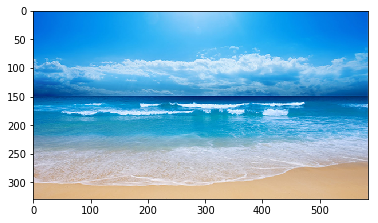

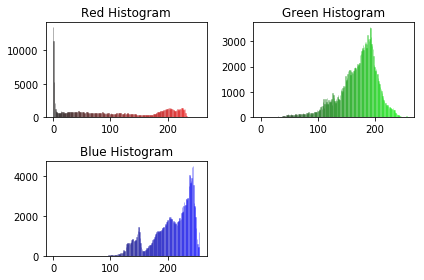

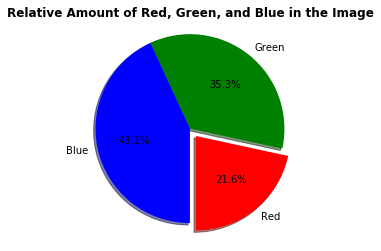

In [7]:
#Reads the image of a beach into an array
beach = mpimg.imread('Images/beach.png')
#Plots the image of a beach from the array data 
beach_plot = plt.imshow(beach)
imageBeach = Image.open('Images/beach.png')


#Color histograms and pie chart for beach image
make_histogram(imageBeach)
make_pie_chart(imageBeach)

### Primarily Green image

For this mostly-green image of a forest, the red-colored histogram is higher than expected because of the additive combination of red and green, which forms a yellow color. The yellow color can be found in the bottom portion of the image and behind the trees. Also, due to the white in the top portion of the color, the red, blue and green histograms will be higher because red, blue, and green combine to create white. 

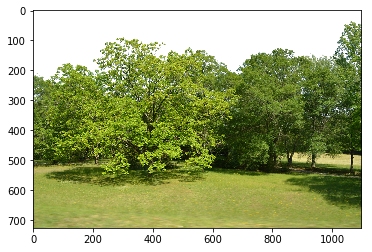

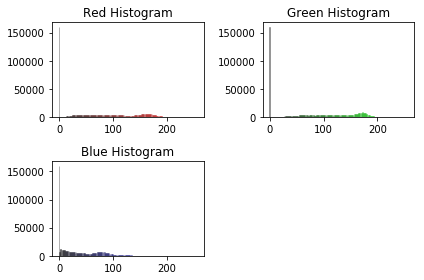

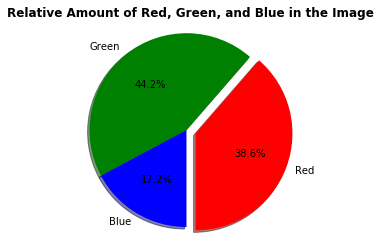

In [8]:
#Reads the image of a forest into an array
forest = mpimg.imread('Images/forest_clearing.png')
#Plots the image of a forest from the array data 
forest_plot = plt.imshow(forest)
imageForest = Image.open('Images/forest_clearing.png')

#Color histograms and pie chart for the image of a forest
make_histogram(imageForest)
make_pie_chart(imageForest)